Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

In [ ]:
df = pd.read_csv('fish_train.csv')
df
# df.shape

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем целевой столбец в числовые метки
df['Species'] = label_encoder.fit_transform(df['Species'])

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,4,150.0,20.4,22.0,24.7,5.8045,3.7544
1,2,250.0,25.4,27.5,28.9,7.2828,4.5662
2,0,430.0,26.5,29.0,34.0,12.4440,5.1340
3,0,925.0,36.2,39.5,45.3,18.7542,6.7497
4,2,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,1,273.0,23.0,25.0,28.0,11.0880,4.1440
115,3,500.0,42.0,45.0,48.0,6.9600,4.8960
116,6,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,2,120.0,20.0,22.0,23.5,6.1100,3.4075


# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])

Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [ ]:
train_x['Width'].mean()

4.546578947368421

# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [ ]:
train_x = train_x.drop(columns='Species')
test_x = test_x.drop(columns='Species')

# Проверим размерности
print("Размерность X_train:", train_x.shape)
print("Размерность y_train:", train_y.shape)


# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(train_x, train_y)

# Делаем предсказания на тестовых данных
y_pred = model.predict(test_x)

# Оцениваем модель с помощью метрики r2_score
r2 = r2_score(test_y, y_pred)

print(f"R2 Score модели: {r2:.4f}")

Размерность X_train: (95, 5)
Размерность y_train: (95,)
R2 Score модели: 0.8856


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

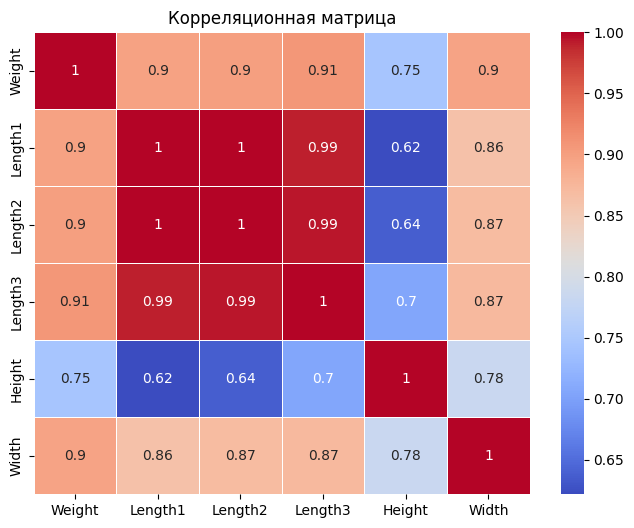

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляционной матрицы
corr_matrix = X.corr()

# Визуализация корреляционной матрицы с помощью seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:
# Отбираем только 3 наиболее коррелированных признаков
X_top_3 = df[['Length1', 'Length2', 'Length3']]
X_top_3

,Length1,Length2,Length3
0,20.4,22.0,24.7
1,25.4,27.5,28.9
2,26.5,29.0,34.0
3,36.2,39.5,45.3
4,19.0,21.0,22.5
...,...,...,...
114,23.0,25.0,28.0
115,42.0,45.0,48.0
116,37.3,40.0,43.5
117,20.0,22.0,23.5


In [ ]:
# Шаг 4: Обучение PCA
pca = PCA(n_components=3, svd_solver='full')  # Обучаем PCA на 1 компоненту
pca_result = pca.fit(X_top_3)

# Доля объясненной дисперсии для первой главной компоненты
explained_variance_ratio = pca.explained_variance_ratio_[0]
print(f"Доля объясненной дисперсии для первой главной компоненты: {explained_variance_ratio:.4f}")

Доля объясненной дисперсии для первой главной компоненты: 0.9963


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
# Применяем PCA к этим признакам
pca = PCA(n_components=1)  # Мы хотим только первую главную компоненту
pca_result = pca.fit_transform(X_top_3)

# Создаем новый признак Lengths
df['Lengths'] = pca_result

# Удаляем старые признаки, которые заменяем
df = df.drop(columns=['Length1', 'Length2', 'Length3'])

print("Данные после замены признаков:")
print(df)

KeyError: "['Length1', 'Length2', 'Length3'] not found in axis"

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

<Axes: xlabel='Width', ylabel='Weight'>

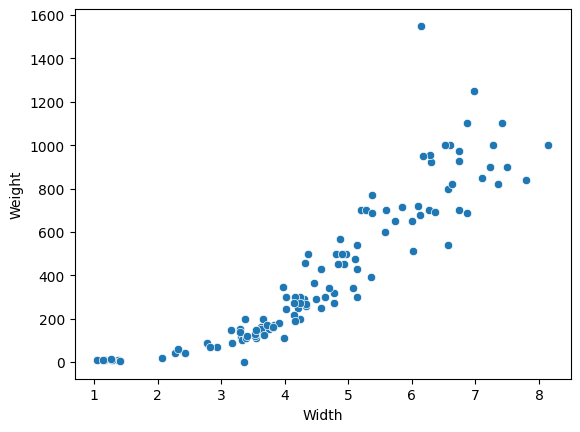

In [ ]:
sns.scatterplot(x = df['Width'], y = df['Weight'])

In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])

train_x = train_x.drop(columns='Species')
test_x = test_x.drop(columns='Species')

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_x, train_y)

# Прогнозирование значений
y_pred = model.predict(test_x)

# Оцениваем модель с помощью метрики r2_score
r2 = r2_score(test_y, y_pred)

print(f"R2 Score модели: {r2:.4f}")

R2 Score модели: 0.8725


Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

<Axes: xlabel='Width_cubed', ylabel='Weight'>

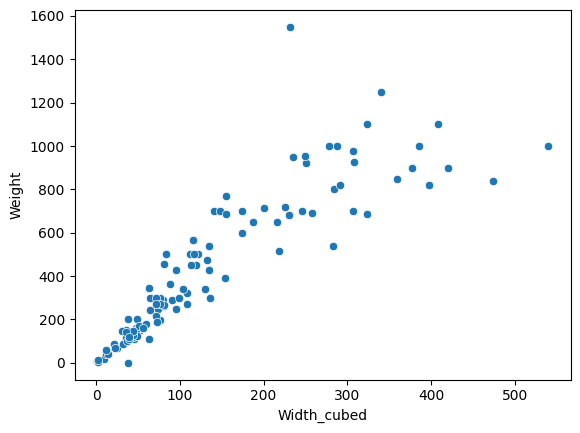

In [ ]:
sns.scatterplot(x = df['Width_cubed'], y = df['Weight'])

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

In [ ]:
# Возводим в куб значения признаков Width, Height и Lengths
df['Width_cubed'] = df['Width'] ** 3
df['Height_cubed'] = df['Height'] ** 3
df['Lengths_cubed'] = df['Lengths'] ** 3

df = df.drop(columns=['Width', 'Height', 'Lengths'])
df

,Species,Weight,Width_cubed,Height_cubed,Lengths_cubed
0,Roach,150.0,52.920218,195.566492,-1515.464970
1,Perch,250.0,95.206103,386.273710,-28.331510
2,Bream,430.0,135.321746,1926.992424,3.780985
3,Bream,925.0,307.505871,6596.227555,7738.235923
4,Perch,110.0,44.928179,184.462936,-2846.376115
...,...,...,...,...,...
114,Parkki,273.0,71.163818,1363.200233,-253.373508
115,Pike,500.0,117.361115,337.153536,21294.896091
116,Whitefish,1000.0,277.805953,1885.483738,7463.435167
117,Perch,120.0,39.564674,228.099131,-1926.494847


In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])

train_x = train_x.drop(columns='Species')
test_x = test_x.drop(columns='Species')

Выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
train_x['Width_cubed'].mean()

126.76474709406482

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])

train_x = train_x.drop(columns='Species')
test_x = test_x.drop(columns='Species')

In [ ]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_x, train_y)


# Прогнозирование значений

y_pred = model.predict(test_x)

# Оцениваем модель с помощью метрики r2_score

r2 = r2_score(test_y, y_pred)
print(f"R2 Score модели: {r2:.8f}")

R2 Score модели: 0.90547947


Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

In [ ]:
df = pd.read_csv('fish_train.csv')

# Отбираем только 3 наиболее коррелированных признаков
X_top_3 = df[['Length1', 'Length2', 'Length3']]
X_top_3

# Применяем PCA к этим признакам
pca = PCA(n_components=1)  # Мы хотим только первую главную компоненту
pca_result = pca.fit_transform(X_top_3)

# Создаем новый признак Lengths
df['Lengths'] = pca_result

# Удаляем старые признаки, которые заменяем
df = df.drop(columns=['Length1', 'Length2', 'Length3'])
df

,Species,Weight,Height,Width,Lengths
0,Roach,150.0,5.8045,3.7544,-11.486348
1,Perch,250.0,7.2828,4.5662,-3.048526
2,Bream,430.0,12.4440,5.1340,1.557884
3,Bream,925.0,18.7542,6.7497,19.779440
4,Perch,110.0,5.6925,3.5550,-14.171988
...,...,...,...,...,...
114,Parkki,273.0,11.0880,4.1440,-6.327814
115,Pike,500.0,6.9600,4.8960,27.717784
116,Whitefish,1000.0,12.3540,6.5250,19.542476
117,Perch,120.0,6.1100,3.4075,-12.442929


In [ ]:
# Возводим в куб значения признаков Width, Height и Lengths
df['Width_cubed'] = df['Width'] ** 3
df['Height_cubed'] = df['Height'] ** 3
df['Lengths_cubed'] = df['Lengths'] ** 3

df = df.drop(columns=['Width', 'Height', 'Lengths'])


,Species,Weight,Width_cubed,Height_cubed,Lengths_cubed
0,Roach,150.0,52.920218,195.566492,-1515.464970
1,Perch,250.0,95.206103,386.273710,-28.331510
2,Bream,430.0,135.321746,1926.992424,3.780985
3,Bream,925.0,307.505871,6596.227555,7738.235923
4,Perch,110.0,44.928179,184.462936,-2846.376115
...,...,...,...,...,...
114,Parkki,273.0,71.163818,1363.200233,-253.373508
115,Pike,500.0,117.361115,337.153536,21294.896091
116,Whitefish,1000.0,277.805953,1885.483738,7463.435167
117,Perch,120.0,39.564674,228.099131,-1926.494847


Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])

train_x = pd.get_dummies(train_x,columns=['Species'])
test_x = pd.get_dummies(test_x,columns=['Species'])

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_x, train_y)

# Прогнозирование значений

y_pred = model.predict(test_x)

# Оцениваем модель с помощью метрики r2_score

r2 = r2_score(test_y, y_pred)
print(f"R2 Score модели: {r2:.6f}")

R2 Score модели: 0.922636


И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
X = df.drop(columns='Weight')
y = df['Weight']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=41, stratify=X['Species'])


train_x = pd.get_dummies(train_x,columns=['Species'],drop_first=True)
test_x = pd.get_dummies(test_x,columns=['Species'],drop_first=True)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_x, train_y)


# Прогнозирование значений

y_pred = model.predict(test_x)

# Оцениваем модель с помощью метрики r2_score

r2 = r2_score(test_y, y_pred)
print(f"R2 Score модели: {r2:.6f}")

R2 Score модели: 0.922636


На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.